**1) Prepare a classification model using SVM for salary data**

In [ ]:
# SVM Classification
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1).csv


In [ ]:
salary_train = pd.read_csv('SalaryData_Train(1).csv')
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1).csv


In [ ]:
salary_test = pd.read_csv('SalaryData_Test(1).csv')
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [ ]:
# Merging Train and Test Data
raw_data = salary_train.append(salary_test)
raw_data.reset_index(inplace=True,drop=True)
raw_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


Data Exploration

In [ ]:
# print shape of dataset with rows and columns
print(raw_data.shape)
# print top 5 records
raw_data.head()

(45221, 14)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Descriptive Statistics

In [ ]:
raw_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


 Missing Values

In [ ]:
raw_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

Duplicated Values

In [ ]:
raw_data[raw_data.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
45210,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
45213,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
45214,25,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K


In [ ]:
raw_data[raw_data.duplicated()].shape

(5982, 14)

Exploratory Data Analysis

In [ ]:
#age and salary

b_df = pd.DataFrame()
b_df['age_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'][['Salary','age']].describe())['age']
b_df['age_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'][['Salary','age']].describe())['age']

b_df

,age_wrt_salary_more_than_50k,age_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,36.749566,44.006067
std,13.564858,10.340502
min,17.000000,19.000000
25%,26.000000,36.000000
50%,34.000000,43.000000
75%,46.000000,51.000000
max,90.000000,90.000000


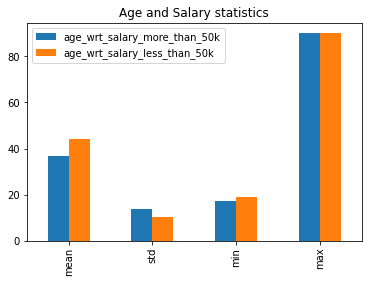

In [ ]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and Salary statistics')

In [ ]:
#capitalgain and salary

a_df = pd.DataFrame()
a_df['capitalgain_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'][['Salary','capitalgain']].describe())['capitalgain']
a_df['capitalgain_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'][['Salary','capitalgain']].describe())['capitalgain']

a_df

,capitalgain_wrt_salary_more_than_50k,capitalgain_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,149.027783,3991.791667
std,927.460669,14616.543746
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,41310.000000,99999.000000


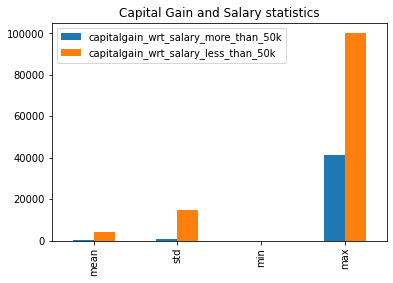

In [ ]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Capital Gain and Salary statistics')

In [ ]:
#capitalloss and deposit
c_df = pd.DataFrame()
c_df['capitalloss_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'][['Salary','capitalloss']].describe())['capitalloss']
c_df['capitalloss_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'][['Salary','capitalloss']].describe())['capitalloss']

c_df

,capitalloss_wrt_salary_more_than_50k,capitalloss_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,53.969188,193.487063
std,312.007128,592.642319
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,4356.000000,3683.000000


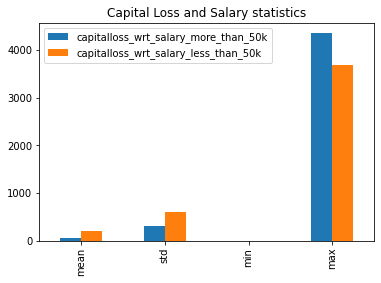

In [ ]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Capital Loss and Salary statistics')

In [ ]:
#hoursperweek and deposit
p_df = pd.DataFrame()
p_df['hoursperweek_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'][['Salary','hoursperweek']].describe())['hoursperweek']
p_df['hoursperweek_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'][['Salary','hoursperweek']].describe())['hoursperweek']

p_df

,hoursperweek_wrt_salary_more_than_50k,hoursperweek_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,39.372005,45.690489
std,11.974303,10.797764
min,1.000000,1.000000
25%,37.000000,40.000000
50%,40.000000,40.000000
75%,40.000000,50.000000
max,99.000000,99.000000


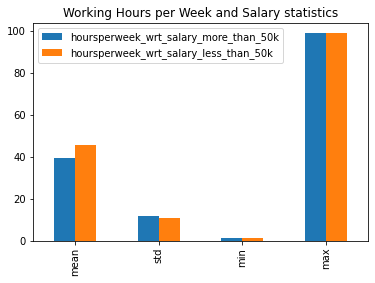

In [ ]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Working Hours per Week and Salary statistics')

Bar plot for categorical variables in the dataset

Text(0.5, 1.0, 'Working Class')

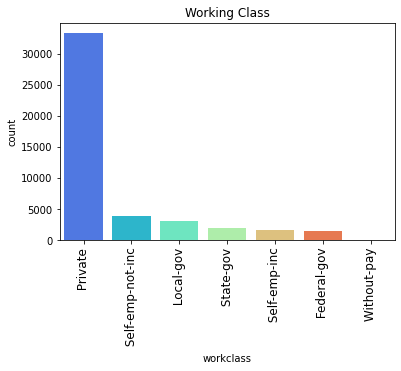

In [ ]:
pal = sns.color_palette('rainbow')
sns.countplot(x='workclass', data=raw_data, palette = pal, 
              order=raw_data['workclass'].value_counts().index, );
plt.xticks(rotation = 90,fontsize = 12)
plt.title('Working Class')

Text(0.5, 1.0, 'Marital Status')

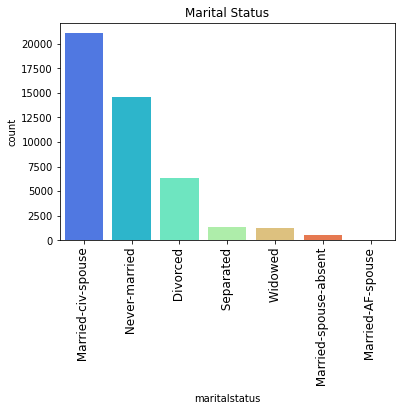

In [ ]:
sns.countplot(x='maritalstatus', data=raw_data, palette = pal, 
              order=raw_data['maritalstatus'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Marital Status')

Text(0.5, 1.0, 'Education')

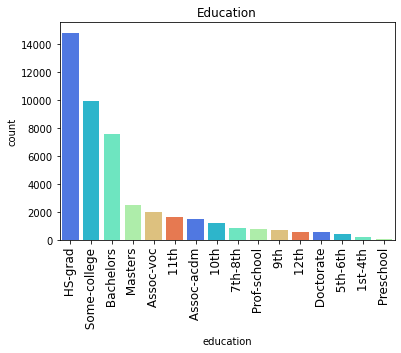

In [ ]:
sns.countplot(x='education', data=raw_data, palette = pal, 
              order=raw_data['education'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Education')

Text(0.5, 1.0, 'Relationship')

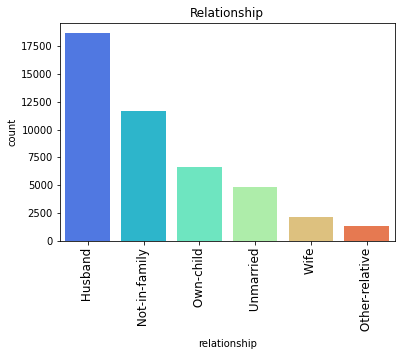

In [ ]:
sns.countplot(x='relationship', data=raw_data, palette = pal, 
              order=raw_data['relationship'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Relationship')

Text(0.5, 1.0, 'Sex')

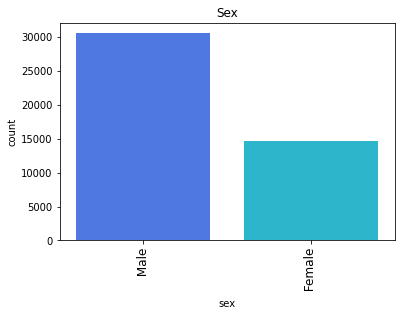

In [ ]:
sns.countplot(x='sex', data=raw_data, palette = pal, 
              order=raw_data['sex'].value_counts().index)
plt.xticks(fontsize = 12,rotation=90)
plt.title('Sex')

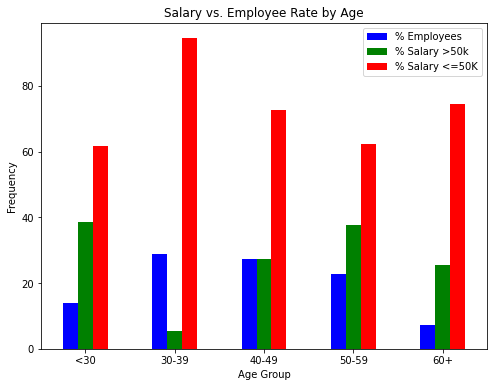

In [ ]:
lst = [raw_data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(raw_data['Salary'],raw_data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(raw_data['age_group'].value_counts())
age['% Employees'] = age['age_group']*100/age['age_group'].sum()
age['% Salary >50k'] = count_age_response_pct[' >50K']
age['% Salary <=50K'] = count_age_response_pct[' <=50K']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Employees','% Salary >50k','% Salary <=50K']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('blue','green','red'))
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Salary vs. Employee Rate by Age')
plt.show()


In [ ]:
#Visualize the Salary rate by Workclass
count_job_response_pct = pd.crosstab(raw_data['Salary'],raw_data['workclass']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
Salary,,,,,,,
<=50K,60.953058,70.483871,78.229148,44.592953,72.102213,73.27852,90.47619
>50K,39.046942,29.516129,21.770852,55.407047,27.897787,26.72148,9.52381


Data Pre-Processing

Label Encoding Technique

In [ ]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
df= raw_data.copy()
label_encoder = preprocessing.LabelEncoder()
df["education"]=label_encoder.fit_transform(df["education"])
df["workclass"]=label_encoder.fit_transform(df["workclass"])
df["maritalstatus"]=label_encoder.fit_transform(df["maritalstatus"])
df["sex"]=label_encoder.fit_transform(df["sex"])
df["race"]=label_encoder.fit_transform(df["race"])
df["occupation"]=label_encoder.fit_transform(df["occupation"])
df["relationship"]=label_encoder.fit_transform(df["relationship"])
df["native"]=label_encoder.fit_transform(df["native"])
df.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,age_group
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K,30.0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K,50.0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K,30.0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K,50.0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K,20.0
5,37,2,12,14,2,3,5,4,0,0,0,40,37,<=50K,30.0
6,49,2,6,5,3,7,1,2,0,0,0,16,21,<=50K,40.0
7,52,4,11,9,2,3,0,4,1,0,0,45,37,>50K,50.0
8,31,2,12,14,4,9,1,4,0,14084,0,50,37,>50K,30.0
9,42,2,9,13,2,3,0,4,1,5178,0,40,37,>50K,40.0


Converting string value into binary classes such as if ">50K" than classify it as '1' else 'O'

In [ ]:
df['Salary'] = raw_data.Salary
df['Salary'] = np.where(df['Salary'].str.contains(" >50K"), 1, 0)
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,age_group
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0,30.0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0,50.0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0,30.0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0,50.0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0,20.0


In [ ]:
x = df.drop('Salary',axis=1)
y = df['Salary']

In [ ]:
x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,age_group
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,30.0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,50.0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,30.0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,50.0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,2,9,13,4,9,3,4,1,0,0,40,37,30.0
45217,39,2,9,13,0,9,1,4,0,0,0,36,37,30.0
45218,38,2,9,13,2,9,0,4,1,0,0,50,37,30.0
45219,44,2,9,13,0,0,3,1,1,5455,0,40,37,40.0


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45216    0
45217    0
45218    0
45219    0
45220    1
Name: Salary, Length: 45221, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [ ]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (31654, 14)
Shape of X_test:  (13567, 14)
Shape of y_train:  (31654,)
Shape of y_test (13567,)


Grid search using Train Test Splits

In [ ]:
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Run SVM with default hyperparameters

In [ ]:
rf_clf = SVC()
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 79.57%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.801600     0.737259  0.795697      0.769429      0.785654
recall         0.967953     0.272913  0.795697      0.620433      0.795697
f1-score       0.876957     0.398363  0.795697      0.637660      0.758344
support    23809.000000  7845.000000  0.795697  31654.000000  31654.000000
_______________________________________________
Confusion Matrix: 
 [[23046   763]
 [ 5704  2141]]

Test Result:
Accuracy Score: 79.72%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.801765     0.751232  0.797229      0.776498      0.789239
recall         0.970306     0.272079  0.797229      0.621192      0.797229
f1-score       0.878021     0.399476  0.797229      0.638748      0.759399
support   

Data Preprocessing

In [ ]:
train1 = salary_train.iloc[:,0:13]

train1 = pd.get_dummies(train1)
train1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
test1 = salary_test.iloc[:,0:13]

test1 = pd.get_dummies(test1)
test1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


Since number of columns are more, let's use PCA

In [ ]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(train1)
train_norm = sc.transform(train1)
train_norm                     #Normalised dataset

array([[ 0.04277892,  1.12889813,  0.14608503, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [ 0.88026081,  1.12889813, -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [-0.0333558 , -0.4397325 , -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       ...,
       [ 1.48933854, -0.4397325 , -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [-1.25151126, -0.4397325 , -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [ 1.03253024, -0.4397325 ,  1.88108414, ...,  0.31081205,
        -0.04611353, -0.0230384 ]])

In [ ]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(test1)
test_norm = sc.transform(test1)
test_norm                     #Normalised dataset

array([[-1.02900513, -1.2165628 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.05742253, -0.43489824, -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.80479376,  0.73759862, -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       ...,
       [-0.05742253,  1.1284309 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [ 0.39100021,  1.1284309 ,  0.562734  , ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.2816339 ,  1.1284309 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441]])

In [ ]:
from sklearn.decomposition import PCA

train_pca = PCA(n_components = 102)
train_pca_values = train_pca.fit_transform(train_norm)
train_pca_values

array([[-5.50838008e-01, -2.38164986e+00, -5.91921169e-01, ...,
        -2.69489445e-15, -1.31715695e-15,  2.67291392e-15],
       [ 2.81915829e+00, -1.37085459e+00, -4.81126421e-02, ...,
        -4.33952133e-16,  1.64051157e-15,  1.45952908e-19],
       [-7.93831525e-01,  8.71803957e-01, -1.20213150e+00, ...,
        -1.11151528e-15, -1.27433761e-15,  8.67282852e-17],
       ...,
       [-2.37835145e+00, -7.98690413e-01,  3.39105780e-01, ...,
         3.89318516e-17,  4.53755982e-17,  2.98585287e-18],
       [-1.97547719e+00,  1.19305162e+00, -1.82899406e+00, ...,
         1.28861398e-17, -7.79288934e-17,  3.35633045e-16],
       [ 7.62131786e-01, -1.77200870e+00,  5.36971989e-01, ...,
        -2.54540415e-16,  2.93934078e-17,  1.12910234e-16]])

In [ ]:
from sklearn.decomposition import PCA

test_pca = PCA(n_components = 102)
test_pca_values = test_pca.fit_transform(test_norm)
test_pca_values

array([[-2.24293780e+00,  2.60318091e+00, -3.27616503e-01, ...,
        -4.12246730e-16,  1.88910215e-15, -1.30513877e-15],
       [ 2.22690391e+00,  1.59471521e+00, -7.32082794e-01, ...,
        -1.45670352e-15,  7.43228843e-15, -1.20326916e-15],
       [ 2.30704416e+00, -1.16883181e+00, -2.00521481e-01, ...,
        -1.18038672e-15, -3.48232927e-16,  4.27025595e-16],
       ...,
       [ 2.39583218e+00, -1.46859740e+00, -2.09424792e-01, ...,
        -1.04759012e-16, -3.18029947e-17,  5.15032905e-17],
       [-1.14039506e+00, -1.03678137e+00,  2.58079490e+00, ...,
        -4.86002559e-16, -6.64694584e-17,  7.42939851e-17],
       [ 3.38445120e+00, -1.95481575e+00, -1.72791531e-01, ...,
         5.41400865e-17, -2.05320433e-17, -1.42409666e-17]])

In [ ]:
# The amount of variance that each PCA explains is 
var = train_pca.explained_variance_ratio_
var

array([4.47952203e-02, 3.03018755e-02, 2.56772664e-02, 2.30740938e-02,
       1.90544461e-02, 1.75159608e-02, 1.66112958e-02, 1.51765356e-02,
       1.40918479e-02, 1.37139289e-02, 1.30161578e-02, 1.27145892e-02,
       1.22845420e-02, 1.20633855e-02, 1.19277829e-02, 1.17776199e-02,
       1.15732784e-02, 1.14595050e-02, 1.12290572e-02, 1.10955712e-02,
       1.09763472e-02, 1.09664173e-02, 1.08013630e-02, 1.07163253e-02,
       1.06965233e-02, 1.06243926e-02, 1.05150466e-02, 1.04401201e-02,
       1.04195534e-02, 1.03772631e-02, 1.02585913e-02, 1.02518285e-02,
       1.02343018e-02, 1.02011311e-02, 1.01746044e-02, 1.00893885e-02,
       1.00693090e-02, 1.00007488e-02, 9.97967518e-03, 9.93621541e-03,
       9.91132587e-03, 9.87257873e-03, 9.85864172e-03, 9.85346688e-03,
       9.83507641e-03, 9.82654639e-03, 9.82141035e-03, 9.81950938e-03,
       9.81361594e-03, 9.80760489e-03, 9.80531422e-03, 9.80056163e-03,
       9.79178710e-03, 9.77352236e-03, 9.77198782e-03, 9.75826765e-03,
      

In [ ]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([  4.48,   7.51,  10.08,  12.39,  14.3 ,  16.05,  17.71,  19.23,
        20.64,  22.01,  23.31,  24.58,  25.81,  27.02,  28.21,  29.39,
        30.55,  31.7 ,  32.82,  33.93,  35.03,  36.13,  37.21,  38.28,
        39.35,  40.41,  41.46,  42.5 ,  43.54,  44.58,  45.61,  46.64,
        47.66,  48.68,  49.7 ,  50.71,  51.72,  52.72,  53.72,  54.71,
        55.7 ,  56.69,  57.68,  58.67,  59.65,  60.63,  61.61,  62.59,
        63.57,  64.55,  65.53,  66.51,  67.49,  68.47,  69.45,  70.43,
        71.4 ,  72.37,  73.34,  74.31,  75.28,  76.24,  77.2 ,  78.16,
        79.12,  80.07,  81.01,  81.95,  82.89,  83.82,  84.75,  85.66,
        86.57,  87.47,  88.36,  89.24,  90.11,  90.97,  91.82,  92.66,
        93.49,  94.28,  95.05,  95.77,  96.49,  97.14,  97.75,  98.35,
        98.88,  99.36,  99.79, 100.03, 100.05, 100.05, 100.05, 100.05,
       100.05, 100.05, 100.05, 100.05, 100.05, 100.05])

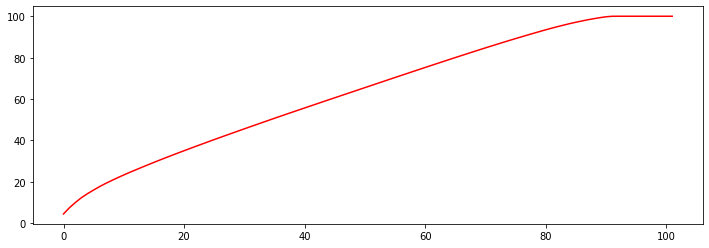

In [ ]:
# Variance plot for PCA components obtained
plt.figure(figsize=(12,4))
plt.plot(var1,color="red");

Selecting first 90 PCAs out of total 102

In [ ]:
finaltrain = pd.concat([pd.DataFrame(train_pca_values[:,0:90]),
                     salary_train[['Salary']]], axis = 1)
finaltrain

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,Salary
0,-0.550838,-2.381650,-0.591921,1.433211,0.340516,1.940931,-0.055056,0.515267,-0.603118,-1.349744,...,0.925827,0.366843,0.762292,0.955908,-0.431471,-0.253518,-0.090683,1.446239,0.537054,<=50K
1,2.819158,-1.370855,-0.048113,0.060772,0.148609,0.494097,0.971070,0.977166,-1.058340,1.543212,...,1.715245,-0.684681,0.173783,-1.120804,1.043838,-1.127099,0.538383,-0.179721,0.006457,<=50K
2,-0.793832,0.871804,-1.202131,-0.513685,0.452004,0.675599,-2.665003,0.041210,0.966047,-0.942719,...,0.666397,-0.126942,-0.368158,0.399572,0.094164,-0.001750,-0.622668,0.114582,0.079789,<=50K
3,0.732942,2.502494,0.763990,-0.149514,-3.056486,0.166519,0.140931,-2.430582,0.155941,1.066790,...,0.058897,0.409911,0.952768,0.193645,0.292208,0.033568,-0.226799,-0.779685,0.367130,<=50K
4,-1.070350,-1.638424,4.542395,0.260940,0.650488,-2.473710,2.483233,-2.795740,-0.249688,1.001833,...,-1.388747,0.857151,-1.132278,0.924125,0.087501,-0.409813,-0.711475,0.566080,-1.599465,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.766825,-1.596732,-0.037113,-0.576608,0.331904,-3.490439,2.320920,-0.117277,-0.388185,-1.112954,...,-0.680328,0.177364,-0.265304,-0.170305,0.307492,-0.087299,-0.407937,1.072890,-0.389103,<=50K
30157,1.704432,1.785328,-0.594925,-0.692498,-0.411458,-1.251061,-0.505186,-0.513443,1.286209,-0.530841,...,0.603116,-0.279650,0.035936,0.532717,-0.070438,-0.160400,0.100112,-0.124855,0.253184,>50K
30158,-2.378351,-0.798690,0.339106,-4.067833,0.281604,-1.215646,-0.253538,1.090962,0.960431,0.065679,...,-1.205160,0.177494,0.668585,0.528450,0.580482,0.156868,-0.442096,0.753165,-0.657852,<=50K
30159,-1.975477,1.193052,-1.828994,1.598638,-0.633416,-0.187607,0.789310,0.860548,0.808205,-0.906124,...,1.329776,-0.312235,0.180269,-1.124998,0.500770,-0.047237,-0.227867,0.993340,-0.939524,<=50K


In [ ]:
finaltest = pd.concat([pd.DataFrame(test_pca_values[:,0:90]),
                     salary_test[['Salary']]], axis = 1)
finaltest

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,Salary
0,-2.242938,2.603181,-0.327617,2.062024,-3.245808,0.812560,-0.442784,-1.685650,0.924250,1.891991,...,0.322344,-0.266021,0.252272,-0.426056,0.051791,0.853665,-0.773508,0.466166,-0.064770,<=50K
1,2.226904,1.594715,-0.732083,-0.582928,0.054350,0.429844,-0.039662,1.000275,0.209847,0.679798,...,-1.039511,0.061724,-0.355513,1.642111,-1.653340,-0.382266,-0.152825,-0.393192,0.398895,<=50K
2,2.307044,-1.168832,-0.200521,0.097952,-1.635067,2.571033,1.024094,-0.651146,-1.099703,-3.652572,...,-0.314783,0.077195,-0.472801,0.653684,1.100821,-0.205823,0.020513,-0.194492,0.308206,>50K
3,1.080755,1.260533,0.937857,-0.024262,-3.174398,-0.970844,-0.340336,-1.973938,-0.711191,1.075373,...,0.651033,0.491425,0.776518,0.289192,0.192050,-0.267516,-0.415089,-0.484431,0.364319,>50K
4,-1.759546,1.778058,-1.256430,0.402017,0.646302,1.112461,-0.656860,0.304387,1.071483,0.751177,...,-0.341200,0.427165,0.069133,-0.864467,0.492786,-0.925634,0.280922,0.994358,-0.493925,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,-0.603437,-1.380653,-1.217944,3.023232,0.463631,0.320846,0.117746,-0.907320,1.101617,0.372391,...,-0.188856,0.102889,0.003352,0.969400,0.325052,1.506765,-0.047672,0.319851,-1.221906,<=50K
15056,-1.670443,-3.020764,0.059822,-0.326201,1.744026,-0.876546,-1.136618,-0.761872,0.720123,-0.079865,...,-0.158983,0.387623,-0.149291,0.919562,0.137806,0.821065,-0.053937,-1.401547,-0.662635,<=50K
15057,2.395832,-1.468597,-0.209425,1.122402,0.364606,-0.944486,0.190120,-1.382649,0.773748,0.171544,...,-0.488672,-0.211695,0.427440,0.216012,0.330597,0.638795,0.215296,-0.532991,-1.089635,<=50K
15058,-1.140395,-1.036781,2.580795,2.251643,-1.495169,-1.684794,-0.913144,2.031935,-0.905050,-0.245674,...,1.018273,2.174690,-0.425788,0.167408,0.560413,2.514837,-0.992345,1.516196,-0.091726,<=50K


In [ ]:
#Since the training dataset is huge, we'll use some part of it for the training purpose, to reduce time consumed.
array = finaltrain.values
X = array[0:1000,0:90]
Y = array[0:1000,90]

In [ ]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.9,0.5,0.1],'C':[1,10,100] },
             {'kernel':['linear'],'C':[1,10,100]}]
gsv = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
gsv.fit(X,Y)

gsv.best_params_ , gsv.best_score_ 

({'C': 10, 'kernel': 'linear'}, 0.8220000000000001)

In [ ]:
#Since the testing dataset is huge, we'll use some part of it for the test purpose, to reduce the time consumed.
x = finaltest.values[0:1000,0:90]
y = finaltest.values[0:1000,90]  

In [ ]:
#SVM Clasification
clf = SVC(C=10, kernel='linear')
clf.fit(x,y)
results = clf.score(x,y)
print(np.round(results, 4))

0.846


Let's try some Ensemble methods to see if we can further increase the accuracy of the model

Trial-1: Bagging

In [ ]:
# Bagged Decision Trees for Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
model.fit(x,y)
results = model.score(x,y)
print(np.round(results, 4))

0.999


Trial-2: Random Forest

In [ ]:
# Random Forest Classification

from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(x,y)
results = model.score(x,y)
print(np.round(results, 4))

0.999


Trial-3: Boosting

In [ ]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
num_trees = 100
seed=7

model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model.fit(x,y)
results = model.score(x,y)
print(np.round(results, 4))

0.942


Trial-4: Stacking

In [ ]:
# Stacking Ensemble for Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = DecisionTreeClassifier()
estimators.append(('cart', model))
model = SVC()
estimators.append(('svm', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(x,y)
results = ensemble.score(x,y)
print(np.round(results, 4))

0.886


**2) Classify the Size_Categorie using SVM**

**Dataset: forestfires.csv**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires.csv


In [ ]:
raw_data=pd.read_csv('forestfires.csv')
raw_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


Data Exploration

In [ ]:
# print shape of dataset with rows and columns
print(raw_data.shape)

(517, 31)


Descriptive Statistics

In [ ]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

Missing Values

In [ ]:
raw_data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
# List of Numerical Variables
numerical_features=[feature for feature in raw_data.columns if raw_data[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
raw_data[numerical_features].head()

Number of numerical variables: 28


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
discrete_feature=[feature for feature in numerical_features if len(raw_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 21


In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [ ]:
# find categorical variables

categorical = [var for var in raw_data.columns if raw_data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['month', 'day', 'size_category']


In [ ]:
#counts of values in categorical variables

for var in categorical: 
    
    print(raw_data[var].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
small    378
large    139
Name: size_category, dtype: int64


In [ ]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(raw_data[var].value_counts()/np.float(len(raw_data)))

aug    0.355899
sep    0.332689
mar    0.104449
jul    0.061896
feb    0.038685
jun    0.032882
oct    0.029014
apr    0.017408
dec    0.017408
jan    0.003868
may    0.003868
nov    0.001934
Name: month, dtype: float64
sun    0.183752
fri    0.164410
sat    0.162476
mon    0.143133
tue    0.123791
thu    0.117988
wed    0.104449
Name: day, dtype: float64
small    0.731141
large    0.268859
Name: size_category, dtype: float64


In [ ]:
# checking for cardinality in categorical variables

for var in categorical:

  print(var, ' contains ', len(raw_data[var].unique()), ' labels')

month  contains  12  labels
day  contains  7  labels
size_category  contains  2  labels


In [ ]:
# correlation 
raw_data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


 Data Visualization

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 <a list of 28 Text major ticklabel objects>)

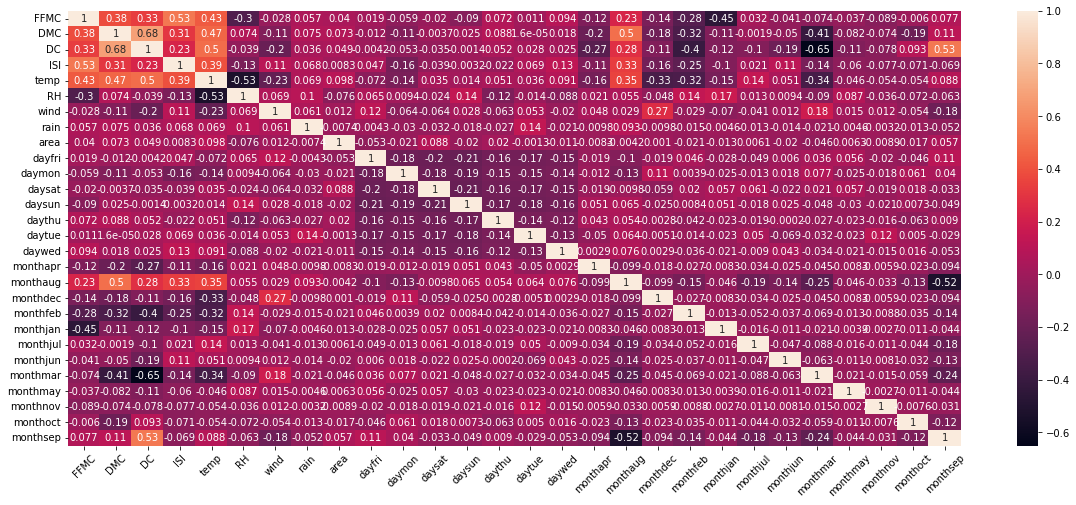

In [ ]:
fig= plt.figure(figsize=(20, 8))
sns.heatmap(raw_data.corr(), annot=True);
plt.xticks(rotation=45)

Univariate plots

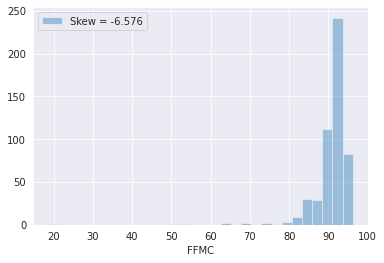

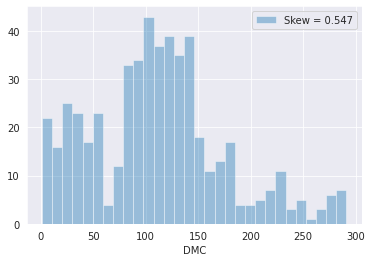

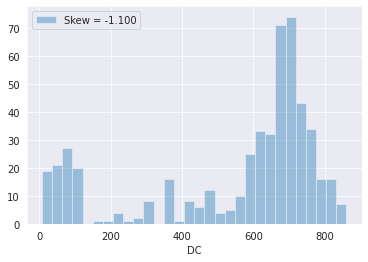

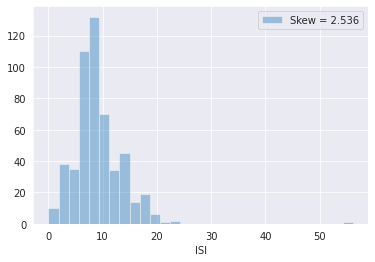

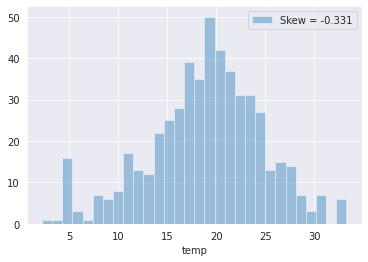

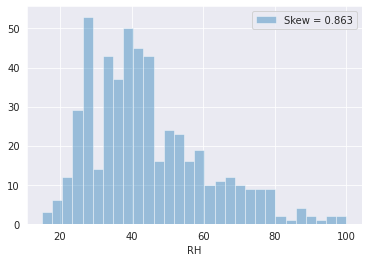

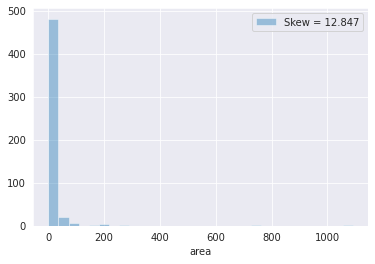

In [ ]:
for feat in continuous_feature:
    skew = raw_data[feat].skew()
    sns.distplot(raw_data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [ ]:
continuous_feature

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'area']

 Outliers Detection

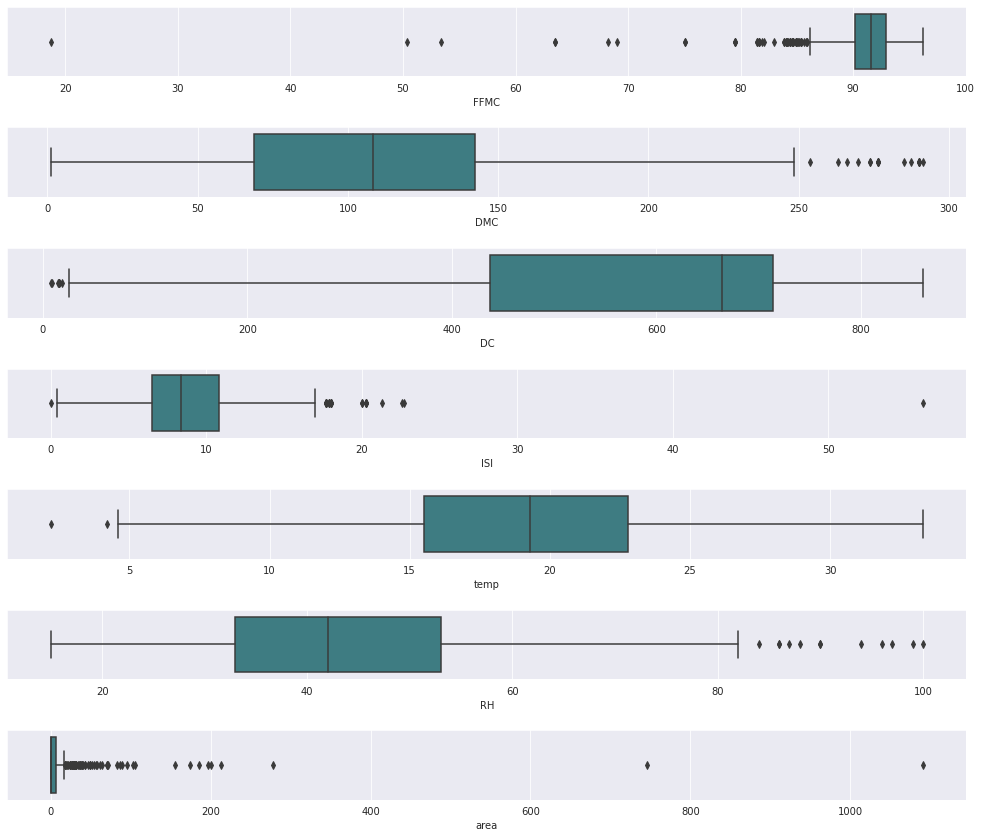

In [ ]:
ot=raw_data.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

In [ ]:
categorical_features=[feature for feature in raw_data.columns if raw_data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
raw_data[categorical_features].head()

Number of Categorical Features: 3 
 ['month', 'day', 'size_category']


,month,day,size_category
0,mar,fri,small
1,oct,tue,small
2,oct,sat,small
3,mar,fri,small
4,mar,sun,small


In [ ]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(raw_data[feature].unique()),feature))

12 number of unique categories in feature named month
7 number of unique categories in feature named day
2 number of unique categories in feature named size_category


In [ ]:
# Decide which categorical variables to use in model
for feature in raw_data.columns:
    if raw_data[feature].dtypes == 'object':# in pandas it is object
        unique_cat = len(raw_data[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(raw_data[feature].value_counts())
        print()

Feature 'month' has 12 unique categories
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

Feature 'day' has 7 unique categories
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

Feature 'size_category' has 2 unique categories
small    378
large    139
Name: size_category, dtype: int64



In [ ]:
print(raw_data['area'].describe(),'\n')
# a categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high
df=raw_data.copy()
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64 



,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,damage_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,small,No damage
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,1,0,small,No damage
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,1,0,small,No damage
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,small,No damage
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,1,0,0,0,0,small,No damage


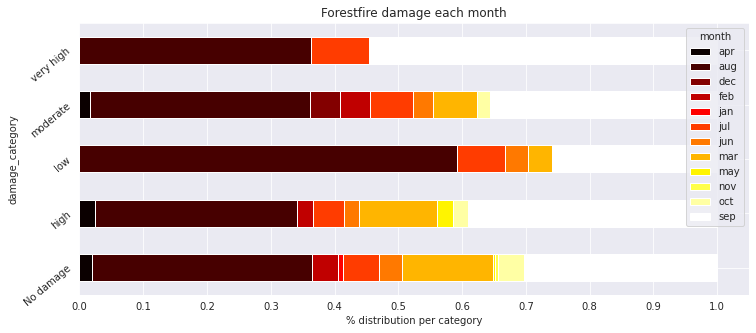

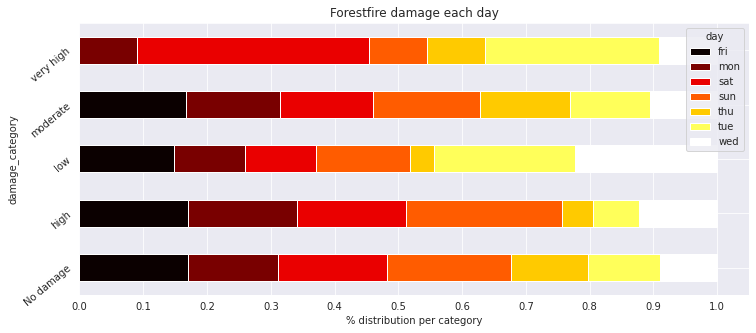

In [ ]:
for col in categorical_features:
    if col!="size_category":
        cross = pd.crosstab(index=df['damage_category'],columns=df[col],normalize='index')
        cross.plot.barh(stacked=True,rot=40,cmap='hot',figsize=(12, 5))
        plt.xlabel('% distribution per category')
        plt.xticks(np.arange(0,1.1,0.1))
        plt.title("Forestfire damage each {}".format(col))
        
plt.show()

[Text(0, 0.5, 'Temperature'),
 Text(0.5, 0, 'Months'),
 Text(0.5, 1.0, 'Month Vs Temp Barplot')]

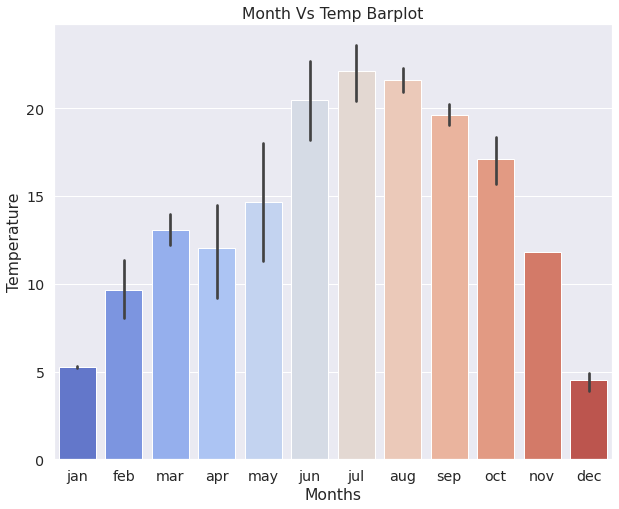

In [ ]:
# setting parameters
plt.rcParams['figure.figsize'] = [10, 8]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = raw_data,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'coolwarm');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature")

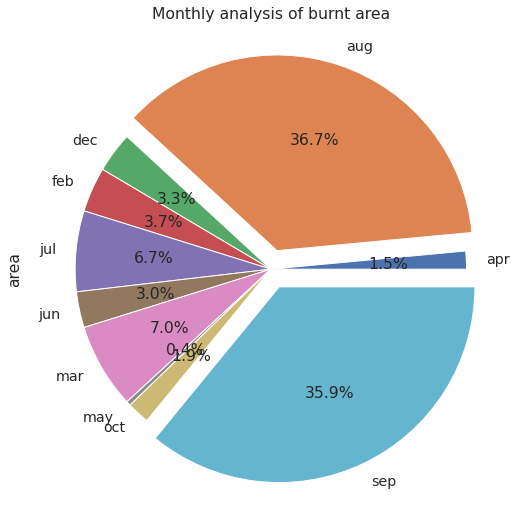

In [ ]:
# monthly analysis of burnt area, where the condition is: area>0
areaburnt=raw_data[raw_data['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),explode=[0,0.1,0,0,0,0,0,0,0,0.1],autopct='%0.1f%%')
plt.show()

Text(0.5, 1.0, 'Forest Fire Size Category')

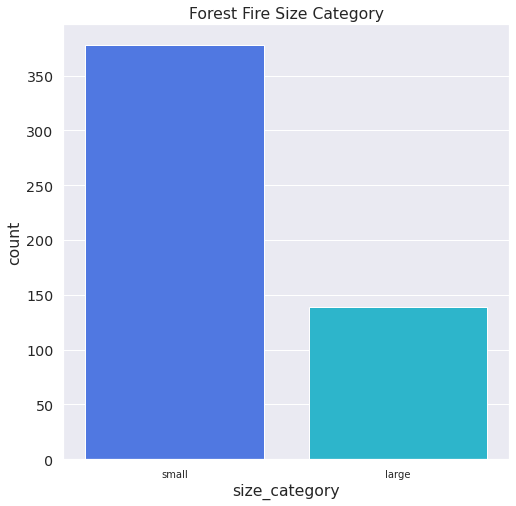

In [ ]:
plt.figure(figsize=(8, 8))
pal = sns.color_palette('rainbow')
sns.countplot(x='size_category', data=raw_data, palette = pal, 
              order=raw_data['size_category'].value_counts().index)
plt.xticks(fontsize = 10)
plt.title('Forest Fire Size Category')

In [ ]:
countsizesmall = len(raw_data[raw_data.size_category == 'small'])
countsizelarge = len(raw_data[raw_data.size_category == 'large'])
print("Percentage of Small Forest Fire Size: {:.2f}%".format((countsizesmall / (len(raw_data.size_category))*100)))
print("Percentage of Large Foreset Fire Size: {:.2f}%".format((countsizelarge / (len(raw_data.size_category))*100)))

Percentage of Small Forest Fire Size: 73.11%
Percentage of Large Foreset Fire Size: 26.89%


Data Pre-Processing

In [ ]:
df = raw_data.copy()
df.drop('size_category',axis=1, inplace =True)
df = pd.get_dummies(df.iloc[:,:])
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,1,0,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,1,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0


Converting Categorical Variable into Label by using Get Dummies FeatureData Pre-Processing

In [ ]:
# Converting string value into binary classes such as if "large" than classify it as '1' else 'O'
df['size_category'] = raw_data.size_category
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,1,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,1,0,0,0,1,0,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,1,0,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# train test split
x= df.drop('size_category',axis=1)
y = df['size_category']

In [ ]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,1,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,1,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,1,0,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,1,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,1,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,1,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,1,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [ ]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (361, 47)
Shape of X_test:  (156, 47)
Shape of y_train:  (361,)
Shape of y_test (156,)


GridSearch CV

In [ ]:
from sklearn.preprocessing  import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(x_train)

MinMaxScaler()

In [ ]:
scaled_x_train = scalar.transform(x_train)

In [ ]:
scaled_x_test = scalar.transform(x_test)

In [ ]:
#Converting Numpy arrays into DataFrame
scaled_X_train = pd.DataFrame(scaled_x_train,columns=x_train.columns)
scaled_X_test = pd.DataFrame(scaled_x_test,columns=x_test.columns)

In [ ]:
rdf_clf= SVC()
rdf_param_grid= {'kernel': ['rbf', 'poly', 'linear'], 'gamma': [50, 10, 6, 5, 4, 0.5], 'degree': [2,3,4], 'C': [15,14,13,12,11,10,1,0.1,0.01,0.001]}
rdf_gsv= GridSearchCV(rdf_clf, param_grid=rdf_param_grid, cv=10)
rdf_gsv.fit(scaled_x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.01, 0.001],
                         'degree': [2, 3, 4], 'gamma': [50, 10, 6, 5, 4, 0.5],
                         'kernel': ['rbf', 'poly', 'linear']})

In [ ]:
#printing the best scores of GSV
rdf_gsv.best_params_, rdf_gsv.best_score_

({'C': 11, 'degree': 2, 'gamma': 4, 'kernel': 'poly'}, 0.8197447447447447)

Using Poly Kernel

In [ ]:
# modeling with best parameters
poly_clf= SVC(kernel='poly', C= 10, degree=2, gamma=10)
poly_clf.fit(scaled_X_train, y_train)

y_pred= poly_clf.predict(scaled_X_test)
acc= accuracy_score(y_test, y_pred)*100
print('Accuracy :', acc)
confusion_matrix(y_test, y_pred)

Accuracy : 82.05128205128204


array([[102,  12],
       [ 16,  26]])